## 1. Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib auto

Using matplotlib backend: module://matplotlib_inline.backend_inline


### a. Read Data

In [3]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

29

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [10]:
for column in df.columns:
    print(f"Column {column} after removing duplicate values: ", list(df[column].unique()))
    print("-"*30)

Column Company after removing duplicate values:  ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']
------------------------------
Column TypeName after removing duplicate values:  ['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible', 'Workstation']
------------------------------
Column Inches after removing duplicate values:  [13.3, 15.6, 15.4, 14.0, 12.0, 11.6, 17.3, 10.1, 13.5, 12.5, 13.0, 18.4, 13.9, 12.3, 17.0, 15.0, 14.1, 11.3]
------------------------------
Column ScreenResolution after removing duplicate values:  ['IPS Panel Retina Display 2560x1600', '1440x900', 'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800', '1366x768', 'IPS Panel Full HD 1920x1080', 'IPS Panel Retina Display 2304x1440', 'IPS Panel Full HD / Touchscreen 1920x1080', 'Full HD / Touchscreen 1920x1080', 'Touchscreen / Quad HD+ 3200x1800', 'IPS Panel Touchscreen 19

In [11]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [12]:
df['Ram'] = df['Weight'].str.replace('kg','').astype('float32')

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,1.37,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,1.34,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1.86,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1.83,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,1.37,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [14]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [15]:
df['Ram'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [16]:
df['Ram'] = df['Ram'].replace('GB','').astype('int32')

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,1,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,1,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,1,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [18]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [19]:
df['Weight'] = df['Weight'].str.replace('kg','').astype('float32')

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,1,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,1,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,1,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [21]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32','int64','float32','float64']).columns

catvars, numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
        'OpSys'],
       dtype='object'),
 Index(['Inches', 'Ram', 'Weight', 'Price'], dtype='object'))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## 2. Exploratory Data Analysis

### 2.1. Price Prediction

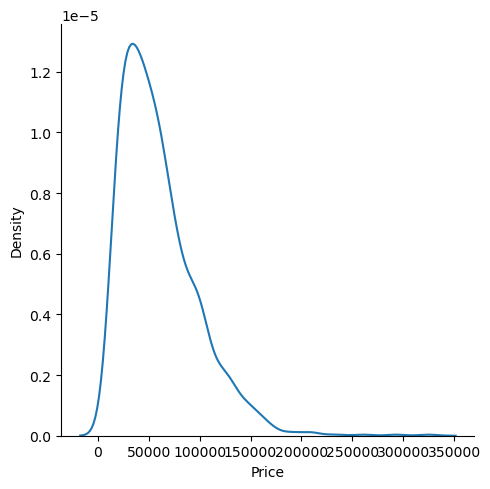

In [23]:
sns.displot(df['Price'], kind="kde")
plt.show()

### 2.2. Distribution of number of laptops in different companies

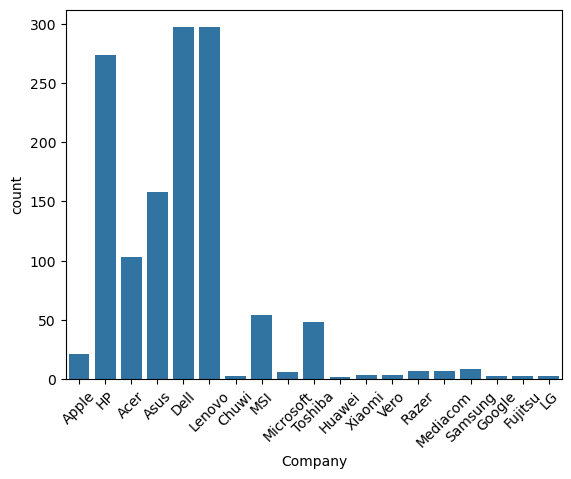

In [24]:
sns.countplot(data=df,x="Company")
plt.xticks(rotation=45)
plt.show()

In [25]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

### 2.3. Distribution of number of laptops for different types

In [26]:
df["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

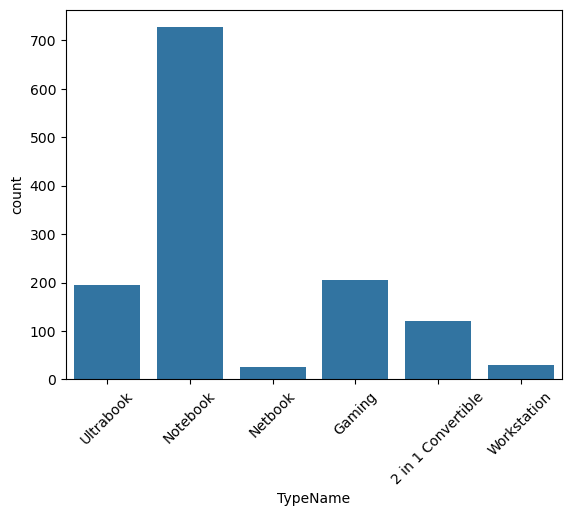

In [27]:
sns.countplot(data=df, x="TypeName")
plt.xticks(rotation=45)
plt.show()

### 2.4. Distribution of number of laptops for different operating systems 

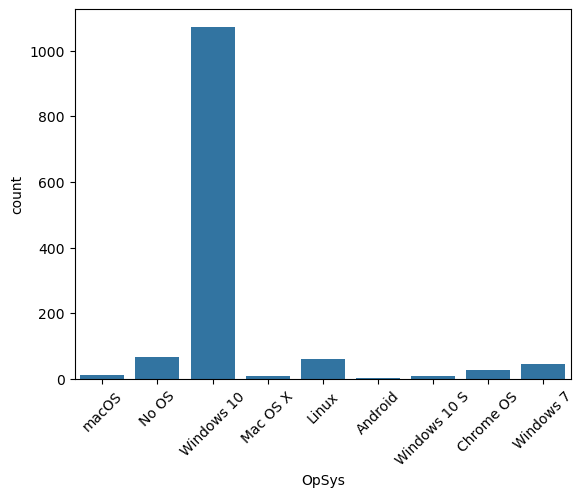

In [28]:
sns.countplot(data=df, x="OpSys")
plt.xticks(rotation=45)
plt.show()

In [29]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,1,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,1,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


### 2.5. Company vs. Price

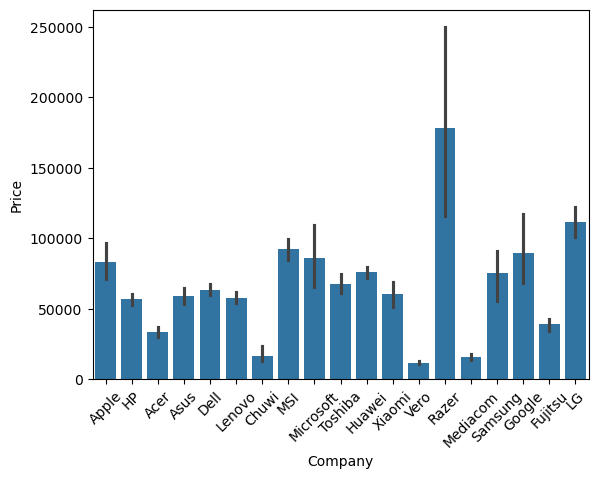

In [30]:
sns.barplot(df,x="Company",y="Price")
plt.xticks(rotation=45)
plt.show()

### 2.6. Laptop Types vs. Price

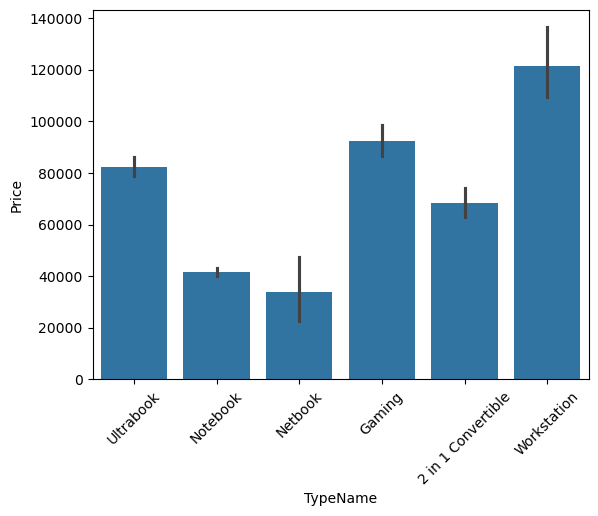

In [32]:
sns.barplot(df,x="TypeName",y="Price")
plt.xticks(rotation=45)
plt.show()

### 2.7. Laptop size vs. Price

<Axes: xlabel='Inches', ylabel='Price'>

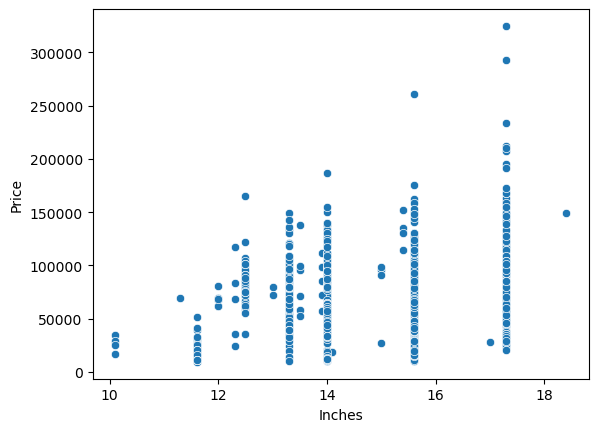

In [33]:
sns.scatterplot(df,x='Inches',y='Price')

### 2.8. Screen resolution traits extraction

#### 2.8.1 TouchScreen

In [34]:
df['TouchScreen'] = df['ScreenResolution'].map(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
785,MSI,Gaming,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,1,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.60,100752.4800,0
150,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,2,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,66560.5728,0
1029,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,2,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,57542.4000,0
736,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,2,256GB SSD,Nvidia Quadro M2200,Windows 10,2.60,128884.3200,0
1025,HP,Ultrabook,12.5,1366x768,Intel Core i5 7200U 2.5GHz,1,256GB SSD,Intel HD Graphics 620,Windows 10,1.26,83063.5200,0


<Axes: xlabel='TouchScreen', ylabel='count'>

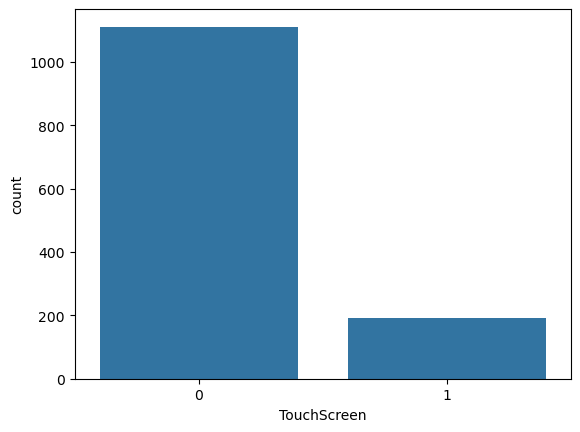

In [35]:
sns.countplot(df, x='TouchScreen')

<Axes: xlabel='TouchScreen', ylabel='Price'>

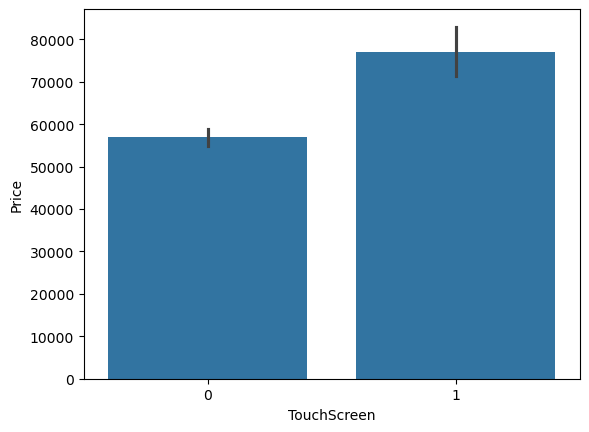

In [36]:
sns.barplot(df, x='TouchScreen', y = 'Price')

#### 2.8.2 IPS

In [37]:
df['IPS'] = df['ScreenResolution'].map(lambda x:1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
298,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,2,1TB HDD,AMD Radeon R5 430,Windows 10,2.40,26586.7200,0,0
396,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,2,256GB SSD,AMD Radeon RX 550,Windows 10,2.10,65510.9568,0,1
451,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,2,256GB SSD,Nvidia Quadro M620,Windows 10,2.17,105228.0000,0,1
1226,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,1,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,78694.5600,1,0
599,Dell,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,2,256GB SSD,Nvidia Quadro M620,Windows 10,2.06,93932.6400,1,0


<Axes: xlabel='IPS', ylabel='count'>

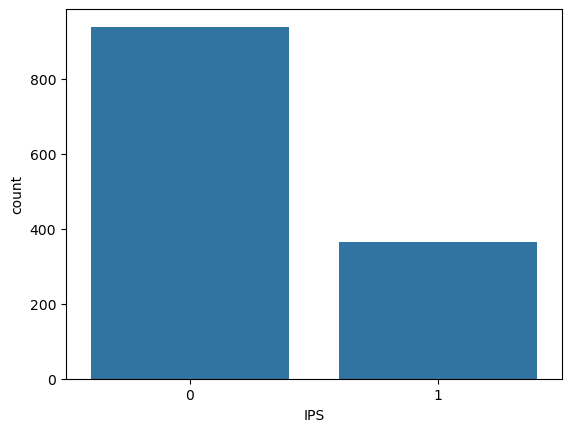

In [38]:
sns.countplot(df, x='IPS')

<Axes: xlabel='IPS', ylabel='Price'>

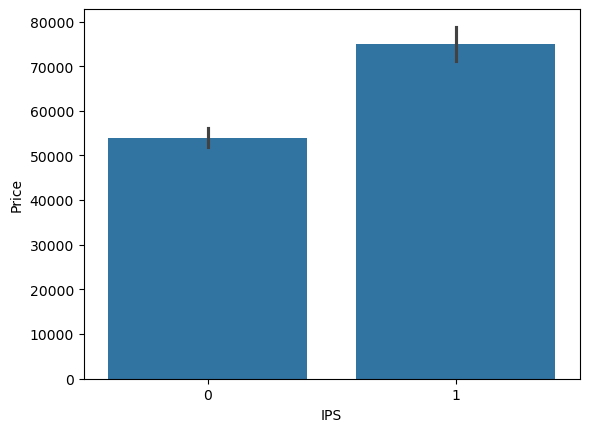

In [40]:
sns.barplot(df, x='IPS', y='Price')

#### 2.8.3 Extract X and Y resolution

In [41]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [42]:
import re

In [43]:
pattern = r"(\d+)x(\d+)"

In [45]:
def get_xy_res(row):
    matches = re.search(pattern, row["ScreenResolution"]).groups(0)
    return int(matches[0]), int(matches[1])

In [46]:
df[["X_res","Y_res"]] = df.apply(get_xy_res, axis=1, result_type="expand")

In [47]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,1,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,1,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


<Axes: >

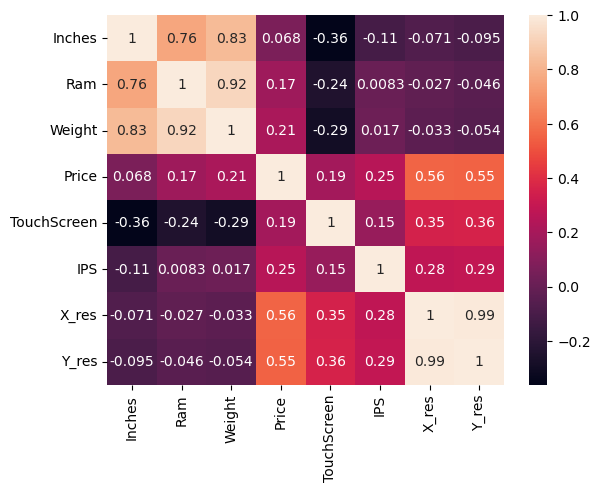

In [49]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [50]:
df.corr(numeric_only=True)['Price'].sort_values()

Inches         0.068197
Ram            0.173722
TouchScreen    0.191226
Weight         0.210370
IPS            0.252208
Y_res          0.552809
X_res          0.556529
Price          1.000000
Name: Price, dtype: float64

#### 2.8.4 Construct PPI

As we can see from the above heatmap, there is a very high correlation between X_res and Y_res. I will construct a new variable called PPI, given X_res, Y_res, and Inches. After that, I will delete X_res, Y_res, and Inches for the sake of retaining model training accruacy later on.

The formula to calculate PPI is below:

## $PPI = \frac{\sqrt{X^2+Y^2}}{Screen Resolution}$

In [51]:
df['PPI']=(((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype(float)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,1,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,1,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,1,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [52]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
Inches,1.000000,0.755337,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404,-0.414804
Ram,0.755337,1.000000,0.921411,0.173722,-0.244727,0.008324,-0.026558,-0.046330,-0.292408
Weight,0.827631,0.921411,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846,-0.323240
Price,0.068197,0.173722,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809,0.473487
TouchScreen,-0.361735,-0.244727,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930,0.460587
IPS,-0.114804,0.008324,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030,0.300879
X_res,-0.071245,-0.026558,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219,0.931217
Y_res,-0.095404,-0.046330,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000,0.939363
PPI,-0.414804,-0.292408,-0.323240,0.473487,0.460587,0.300879,0.931217,0.939363,1.000000


In [53]:
df.corr(numeric_only=True)['Price'].sort_values()

Inches         0.068197
Ram            0.173722
TouchScreen    0.191226
Weight         0.210370
IPS            0.252208
PPI            0.473487
Y_res          0.552809
X_res          0.556529
Price          1.000000
Name: Price, dtype: float64

In [54]:
data_enums = {}
data_enums["ScreenResolution"] = list(df.apply(lambda x : "%dX%d" %(x["X_res"],x["Y_res"]),axis=1).unique())

In [55]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,1,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,1,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,1,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,1,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
